## Supplement 3: Regression

In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3.2 Programming Task: Gradient Descent
Consider the function $J(\boldsymbol{w})=J(w_0, w_1) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot using the Matplotlib module. 

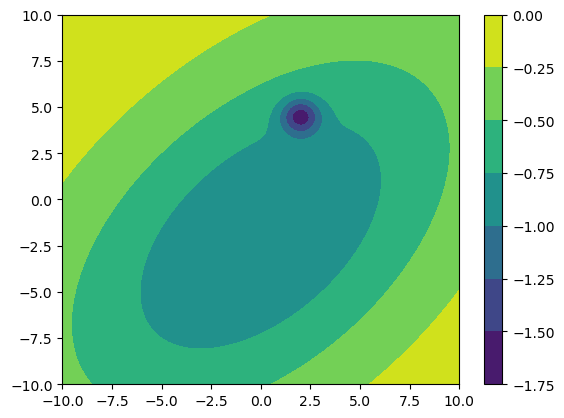

In [44]:
# TODO: Define function J(w)
def J(w):
    w0 = w[0]
    w1 = w[1]
    return -np.exp(-1/100 * (w0**2 + w1**2 - w0*w1 - 2*w0 + 4*w1 + 5) ) - 2*np.exp(-(w0**2 + w1**2 - 4*w0 - 9*w1 + 25) )


# TODO: Prepare contours plot of J(w)
def plot_J_w_contour():
    w0list = np.linspace(-10.0, 10.0, 1000)
    w1list = np.linspace(-10.0, 10.0, 1000)
    W0, W1 = np.meshgrid(w0list, w1list)

    J_w = J((W0, W1))


    
    cp = plt.contourf(W0, W1, J_w)
    plt.colorbar(cp)

plot_J_w_contour()

ii\. Obtain the gradient of the above function by hand.
            
  $Hint:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

iii\. Implement gradient descent algorithm described in the lecture to find the minimum of this
            function using the NumPy module. Plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

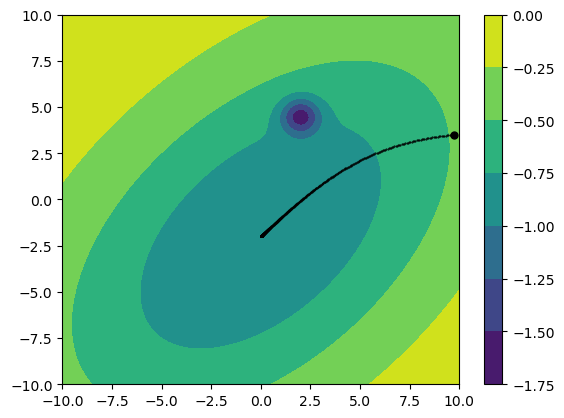

In [45]:
# TODO: Define function gradient_J(w)
def grad_J(w):
    w0 = w[0]
    w1 = w[1]
    grad = [-np.exp(-1/100 * (w0**2 + w1**2 - w0*w1 - 2*w0 + 4*w1 + 5) ) * -1/100 * (2 * w0 - w1 - 2) - 2*np.exp(-(w0**2 + w1**2 - 4*w0 - 9*w1 + 25) ) * -(2*w0 - 4),
            -np.exp(-1/100 * (w0**2 + w1**2 - w0*w1 - 2*w0 + 4*w1 + 5) ) * -1/100 * (2 * w1 - w0 + 4) - 2*np.exp(-(w0**2 + w1**2 - 4*w0 - 9*w1 + 25) ) * -(2*w1 - 9)]

    return np.array(grad)


# TODO: Define the gradient descent algorithm as function
def step(w, step_size):
    grad = grad_J(w)
    return w - step_size * grad


# TODO: Train w 
# Store each update of w in an array to make plot later.
epoch = 1000
w = np.random.rand(2)*20 - 10
w_list = np.zeros((epoch+1, 2))
w_list[0, : ] = w

for i in range(epoch):
    w = step(w, 1)
    w_list[i+1, :] = w


# TODO: Prepare contour plot and mark each weight update on the plot.
plot_J_w_contour()
plt.plot(w_list[0,0], w_list[0,1], 'k.', ms=10)
plt.plot(w_list[:,0], w_list[:,1], 'k.', ms=1)


### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

In [46]:
# TODO: Read and prepare scatter plot

housing_data = np.genfromtxt("house_prices.txt", delimiter=",")
print(housing_data.shape)


(47, 3)


ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$, 
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$
    is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\
    x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and
    $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour
    plot. You may rescale the data if required. 

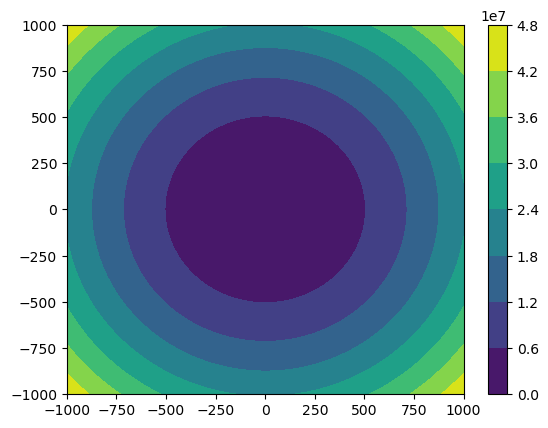

In [47]:
# TODO: Define function J(w)


# normalize
std = np.std(housing_data, axis=0)
mean = np.mean(housing_data, axis=0)

housing_data -= mean
housing_data /= std

x = np.concatenate( ( np.ones((len(housing_data), 1)), np.expand_dims(housing_data[:, 0], axis=1) ), axis=1)
y = housing_data[:, 2]
def J(w):
    w0 = w[0]
    w1 = w[1]
    error = 0
    for i, el in enumerate(x):        
        error += np.square((el[0] * w0 + el[1] * w1 - y[i]))
    return error / 2



# TODO: Define function gradient_J(w)
def gradient_J(w):
    grad = 2*(x.T @ x @ w) -2* x.T @ y
    return grad


# TODO: Plot the cost function
def plot_J_w_contour():
    w0list = np.linspace(-1000.0, 1000.0, 1000)
    w1list = np.linspace(-1000.0, 1000.0, 1000)
    W0, W1 = np.meshgrid(w0list, w1list)

    J_w = J((W0, W1))


    
    cp = plt.contourf(W0, W1, J_w)
    plt.colorbar(cp) 

plot_J_w_contour()

* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

Result:  [-9.11328923e-17  8.54987593e-01]


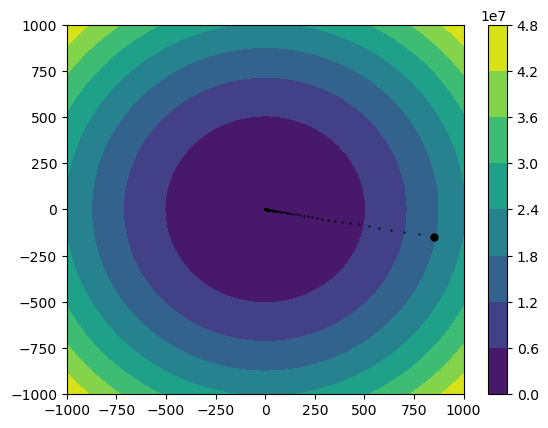

In [52]:
# TODO: Train w 
# Store each update of w in an array to make plot later.
def step(w, step_size):
    grad = gradient_J(w)
    return w - step_size * grad


# TODO: Train w 
# Store each update of w in an array to make plot later.
def fit(w, learning_rate, epoch=1000):    
    w_list = np.zeros((epoch+1, 2))
    w_copy = w.copy()
    w_list[0, :] = w_copy
    

    for i in range(epoch):
        w_copy = step(w_copy, learning_rate)
        w_list[i+1, :] = w_copy
    return w_list

w = np.random.rand(2)*2000 - 1000
w_list = fit(w, 0.001)


# TODO: Prepare contour plot and mark each weight update on the plot.
plot_J_w_contour()
plt.plot(w_list[0,0], w_list[0,1], 'k.', ms=10)
plt.plot(w_list[:,0], w_list[:,1], 'k.', ms=1)
print("Result: ", w_list[-1])

# OPTIONAL: Plot the resulting linear regression function

* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

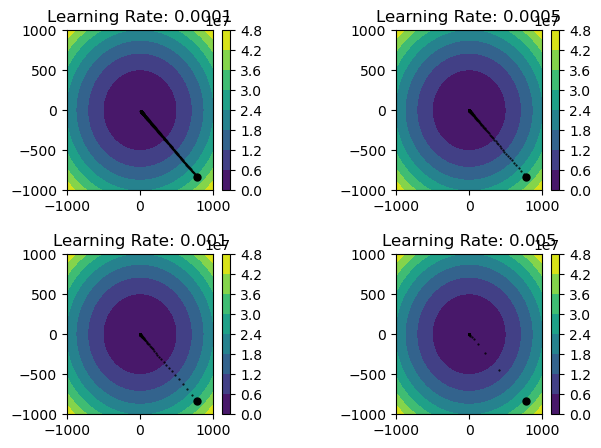

In [49]:
# TODO: Define alphas (learning rates) to test.
learning_rates = [0.0001, 0.0005, 0.001, 0.005]



# TODO: Repeat experiment for each alpha and observe the contour plot in each case. You may use subplots in Matplotlib for the plots.
w_init = np.random.rand(2)*2000 - 1000
for i, lr in enumerate(learning_rates):
    w_list = fit(w_init, lr, epoch=500)
    plt.subplot(2,2,i+1)
    plot_J_w_contour()
    plt.plot(w_list[0,0], w_list[0,1], 'k.', ms=10)
    plt.plot(w_list[:,0], w_list[:,1], 'k.', ms=1)
    plt.title("Learning Rate: {}".format(lr))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.8,
                    hspace=0.4)


iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [50]:
# TODO: Compute the closed form solution
w = np.linalg.inv(x.T @ x) @ x.T @ y
print(w)

[-7.97972799e-17  8.54987593e-01]
